In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline



In [3]:
# Reading in the data
stock_data = pd.read_csv('~/Documents/practicum/stock_data.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
benchmark_data = pd.read_csv('~/Documents/practicum/benchmark_index.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

## Summary for Stock Data and Benchmark Data

In [4]:
# Summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head())
# Summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apple      252 non-null    float64
 1   Microsoft  252 non-null    float64
 2   Tesla      252 non-null    float64
 3   Starbucks  252 non-null    float64
 4   Amazon     252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB
             Apple  Microsoft   Tesla  Starbucks   Amazon
Date                                                     
2020-10-05  116.50     210.38  425.68      88.47  3199.20
2020-10-06  113.16     205.91  413.98      87.01  3099.96
2020-10-07  115.08     209.83  425.30      88.45  3195.69
2020-10-08  114.97     210.58  425.92      89.53  3190.55
2020-10-09  116.97     215.81  434.00      90.01  3286.65

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 1 columns):
 #   C

## Visualizing and Summarizing Stock Data

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,131.606865,248.820437,657.230794,107.864960,3285.608413
std,11.183901,29.668872,117.110005,9.088476,159.571700
min,108.770000,202.330000,388.040000,85.970000,2951.950000
25%,122.757500,221.610000,605.127500,102.927500,3175.472500
50%,130.285000,244.345000,670.955000,110.385000,3270.465000
75%,142.030000,277.345000,730.355000,114.632500,3379.165000
max,156.690000,305.220000,883.090000,126.060000,3731.410000


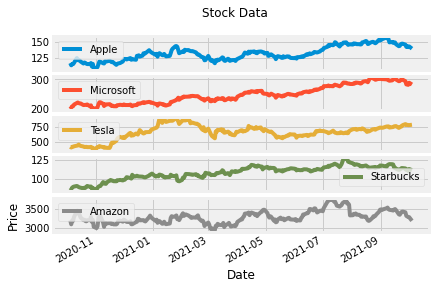

In [5]:
# visualize the stock_data
stock_data.plot(subplots = True,title = 'Stock Data')
plt.ylabel('Price')
# summarize the stock_data
stock_data.describe()

## Visualizing and Summarizing the Benchmark Index

,S&P 500
count,252.000000
mean,4014.999444
std,337.258433
min,3269.960000
25%,3734.530000
50%,4075.925000
75%,4310.640000
max,4536.950000


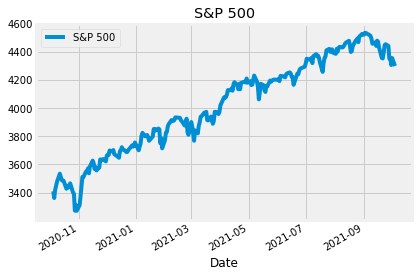

In [6]:
# Visualize the benchmark index
benchmark_data.plot(title = 'S&P 500')
# Summarize the benchmark index
benchmark_data.describe()

## Daily Stock Returns

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000860,0.001280,0.002981,0.001020,0.000126
std,0.017496,0.013878,0.033765,0.014130,0.016594
min,-0.056018,-0.049566,-0.085499,-0.065145,-0.075649
25%,-0.008582,-0.005633,-0.018009,-0.007232,-0.008574
50%,0.000419,0.000560,0.001663,0.000262,0.000719
75%,0.012130,0.009985,0.020486,0.008964,0.009458
max,0.063521,0.048249,0.196412,0.057694,0.063230


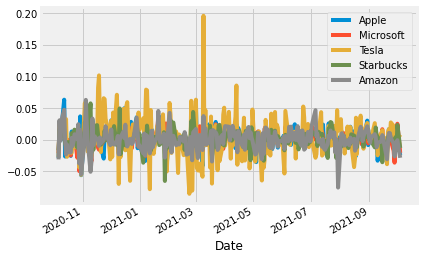

In [7]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()

# summarize the daily returns
stock_returns.describe()

## Daily Benchmark Index Returns

count    251.000000
mean       0.000964
std        0.008670
min       -0.035288
25%       -0.003514
50%        0.001165
75%        0.006465
max        0.023791
Name: S&P 500, dtype: float64

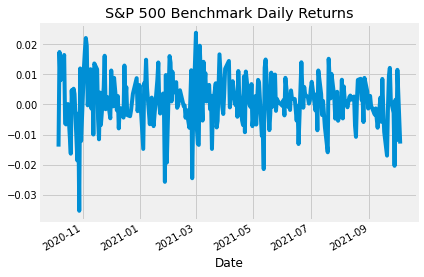

In [8]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(title = 'S&P 500 Benchmark Daily Returns')

# summarize the daily returns
sp_returns.describe()

## Difference in Daily Returns

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.000104,0.000316,0.002018,0.000056,-0.000838
std,0.013177,0.009676,0.031258,0.011292,0.013679
min,-0.044746,-0.035524,-0.077766,-0.043978,-0.070243
25%,-0.007935,-0.005187,-0.017270,-0.005345,-0.007837
50%,-0.000848,-0.000048,0.000702,-0.000523,-0.001097
75%,0.007046,0.005346,0.018526,0.004830,0.006006
max,0.047102,0.028131,0.182257,0.050986,0.048949


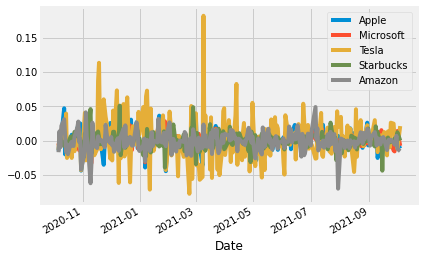

In [9]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

## Mean of Excess Returns

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

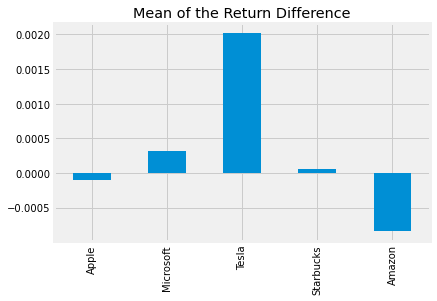

In [10]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')

## Standard Deviations of Excess Returns

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

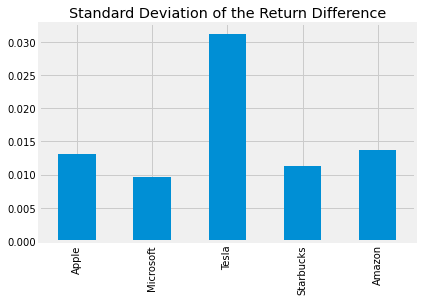

In [11]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')

## Daily Sharpe Ratio Calculation

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

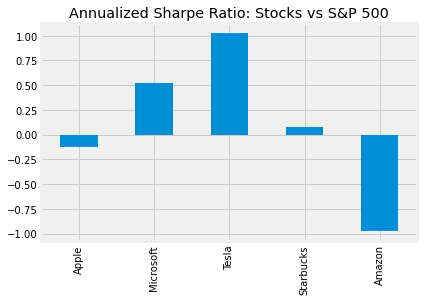

In [12]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

## Tesla had the highest 1 year Sharpe Ratio while Microsoft was 2nd and Starbuck 3rd.
## Apple and Amazon both had a negative Sharpe Ratio from the last year, because the risks outweighed its returns.
Recommendation based off the last year is to invest in Tesla and Microsoft.